In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df=pd.read_csv("dataset/Tiroid.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
print(df.drop_duplicates(inplace=True))
df.reset_index(drop=True, inplace=True) 


None


In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    ob

# Visu

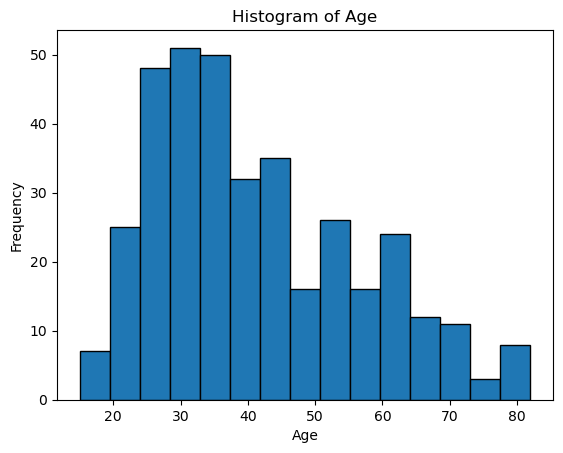

In [8]:
plt.hist(df["Age"],bins=15,edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

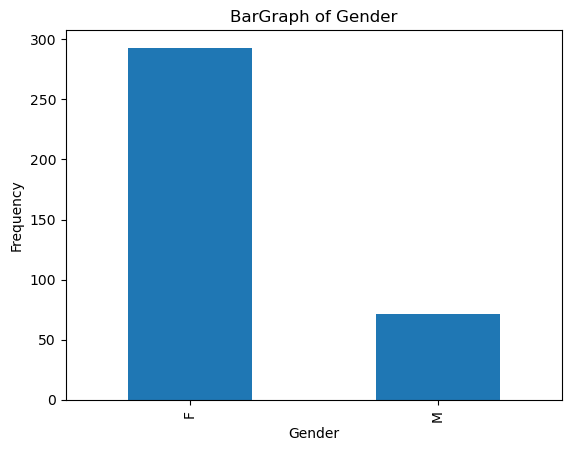

In [9]:
count_gen=df["Gender"].value_counts()
ax=count_gen.plot(kind='bar')
ax.set_ylabel("Frequency")
ax.set_title("BarGraph of Gender")
plt.show()

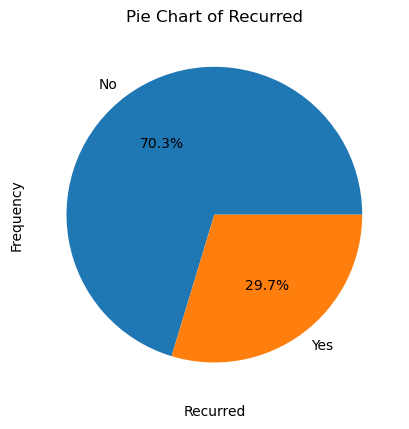

In [10]:

count_gen = df["Recurred"].value_counts()
ax = count_gen.plot(kind='pie', autopct='%1.1f%%')
ax.set_ylabel("Frequency")
ax.set_title("Pie Chart of Recurred")
plt.xlabel("Recurred")
plt.show()


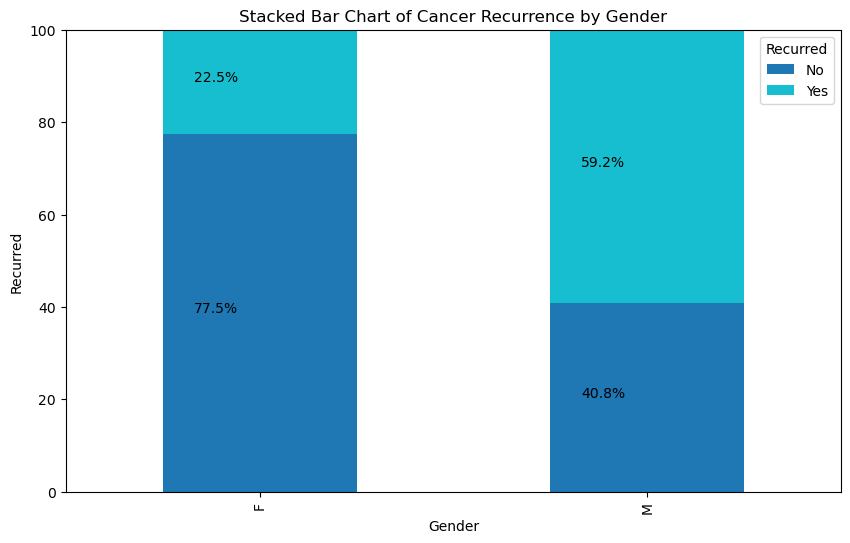

In [11]:
cross_tab=pd.crosstab(index=df["Gender"],columns=df["Recurred"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)*100

cross_tab_norm.plot(kind="bar",stacked=True,colormap='tab10',figsize=(10,6))

plt.xlabel("Gender")
plt.ylabel("Recurred")
plt.title("Stacked Bar Chart of Cancer Recurrence by Gender")
for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x],
                                   cross_tab_norm.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10)
plt.ylim(0,100)
plt.show()

### cheack whether there are any association between smorking and reccured cancer

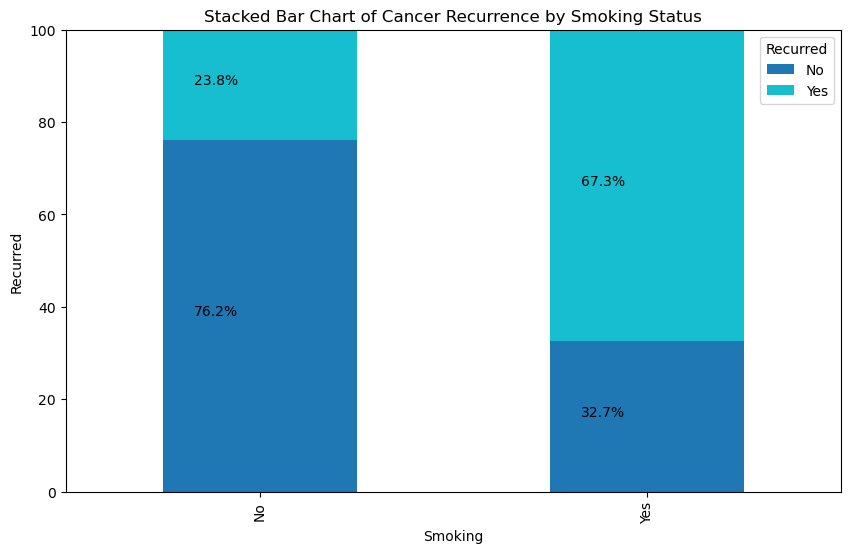

In [12]:
cross_tab=pd.crosstab(index=df["Smoking"],columns=df["Recurred"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)*100

cross_tab_norm.plot(kind="bar",stacked=True,colormap='tab10',figsize=(10,6))

plt.xlabel("Smoking")
plt.ylabel("Recurred")
plt.title("Stacked Bar Chart of Cancer Recurrence by Smoking Status")

for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x],
                                   cross_tab_norm.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion , 1)}%', 
                 color="black",
                 fontsize=10)
plt.ylim(0, 100)
plt.show()

#### Chisqure test

In [13]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['Smoking_n']=df["Smoking"].astype("category").cat.codes
df['Recurre_n']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['Smoking'], df['Recurred'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

#drop created columns
df.drop(columns=['Smoking_n',"Recurre_n"],inplace=True)

Chi-Square Statistic: 36.46035236625514
p-value: 1.558034128003967e-09
Degrees of Freedom: 1
Expected Frequencies:
 [[221.53846154  93.46153846]
 [ 34.46153846  14.53846154]]


In [14]:
##Smoking status vs gender

<Axes: xlabel='Gender', ylabel='Smoking'>

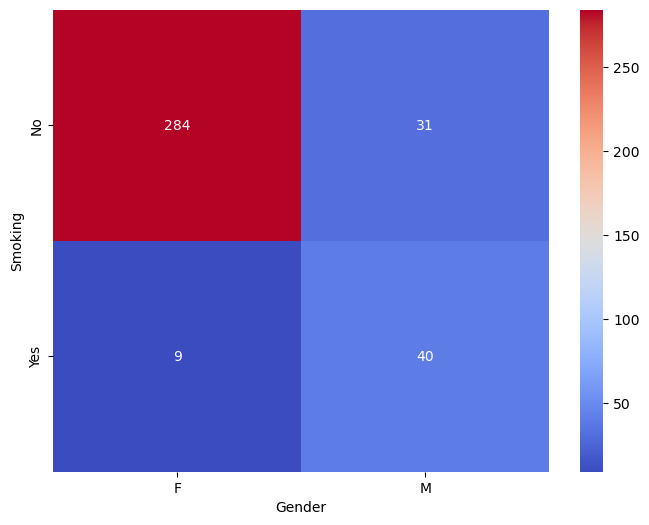

In [15]:
crostab=pd.crosstab(df["Smoking"],df["Gender"])
plt.figure(figsize=(8, 6))
sns.heatmap(crostab, annot=True, cmap="coolwarm", fmt="d")

In [16]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### check whather how to canser react the treatment(response) According to the paitent age

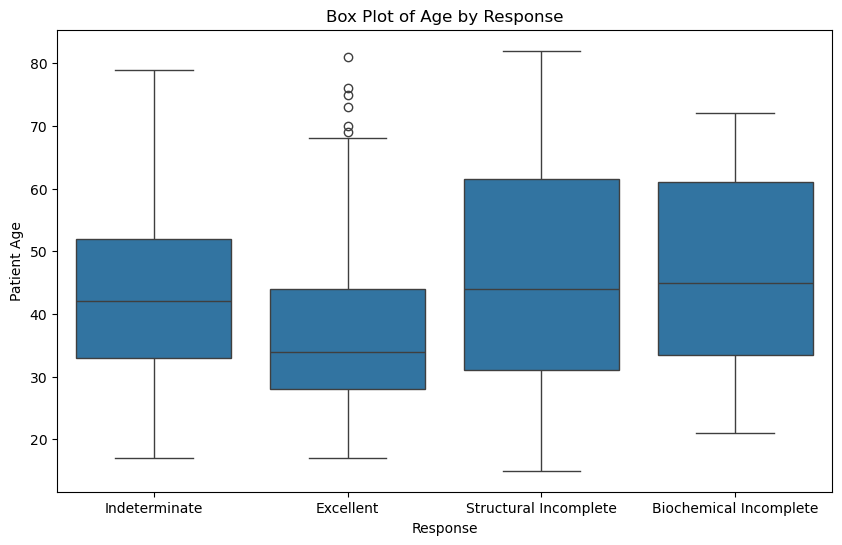

In [17]:
plt.figure(figsize=(10,6)) # the first figure

sns.boxplot(x=df["Response"], y=df["Age"])
plt.xlabel("Response")
plt.ylabel("Patient Age")
#plt.xticks(rotation=45, ha='right')
plt.title("Box Plot of Age by Response")
plt.show()


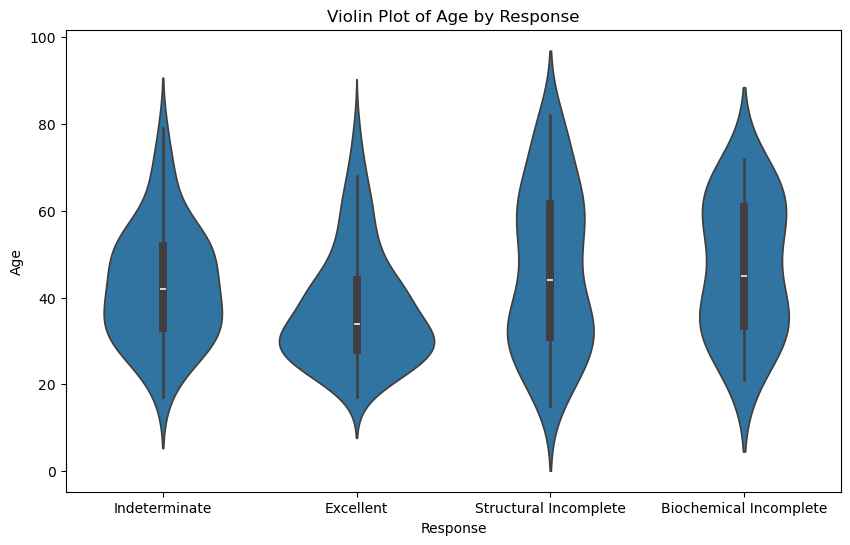

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Response'], y=df["Age"])
plt.title('Violin Plot of Age by Response')
plt.show()

In [19]:
from scipy.stats import kruskal
df["Response"].value_counts()

Response
Excellent                 189
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [20]:
df['Responsess']=df["Response"].astype("category").cat.codes
df.tail(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Responsess
354,31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes,3
355,62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes,3
356,59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes,3
357,40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes,3
358,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes,3
359,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,0
360,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,3
361,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,3
362,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,3
363,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,3


In [21]:
# Extract values for each group
group_A = df[df['Responsess'] == 1]['Age']
group_B = df[df['Responsess'] == 3]['Age']
group_C = df[df['Responsess'] == 2]['Age']
group_D = df[df["Responsess"] == 0]["Age"]


In [22]:
stat,p_value = kruskal(group_A,group_B,group_C,group_D)
print("Kruskal wallis value(H value):",stat)
print("P value:",p_value)


Kruskal wallis value(H value): 21.263614940863462
P value: 9.280468429638354e-05


In [23]:

#H0 : There is no difference in location between the populations from which the 4 samples have been drawn.

#H1: There is a difference in location in one or more populations

c_value=7.815

if stat >= c_value:
    print("we reject H0")
else:
    print("we do not reject H0")
    

we reject H0


In [24]:
#remove the created variable
df.drop(columns="Responsess",inplace=True)

### check whether there is any association between cancer stage and responce

<Figure size 10000x600 with 0 Axes>

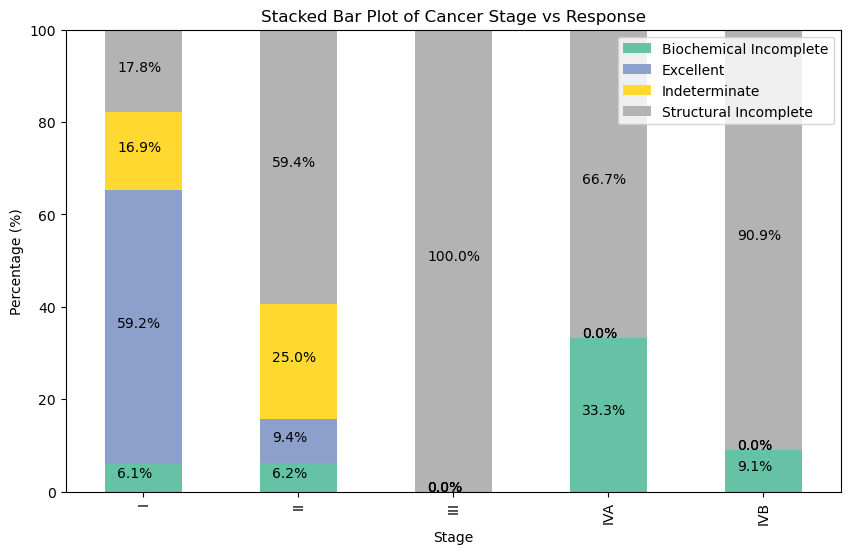

In [25]:
cross_tab = pd.crosstab(index=df["Stage"], columns=df["Response"])
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100  # Scale to percentages

# Plot stacked bar chart with custom colors
plt.figure(figsize=(100, 6))
cross_tab_norm.plot(kind="bar", stacked=True, colormap='Set2', figsize=(10, 6))

plt.xlabel("Stage")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*cross_tab_norm.index.values]):
    for (proportion, y_loc) in zip(cross_tab_norm.loc[x], cross_tab_norm.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Cancer Stage vs Response')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.show()

In [26]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['Stage_s']=df["Stage"].astype("category").cat.codes
df['Response_s']=df["Response"].astype("category").cat.codes

contingency_table = pd.crosstab(df['Stage_s'], df['Response_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['Stage_s','Response_s'],inplace=True)

Chi-Square Statistic: 83.71160683196993
p-value: 8.046302591992016e-13
Degrees of Freedom: 12
Expected Frequencies:
 [[ 19.84065934 163.03846154  52.62087912  78.5       ]
 [  2.02197802  16.61538462   5.36263736   8.        ]
 [  0.25274725   2.07692308   0.67032967   1.        ]
 [  0.18956044   1.55769231   0.50274725   0.75      ]
 [  0.69505495   5.71153846   1.84340659   2.75      ]]


### check whether canser recuured vs  Focality have a replationship

<Figure size 10000x600 with 0 Axes>

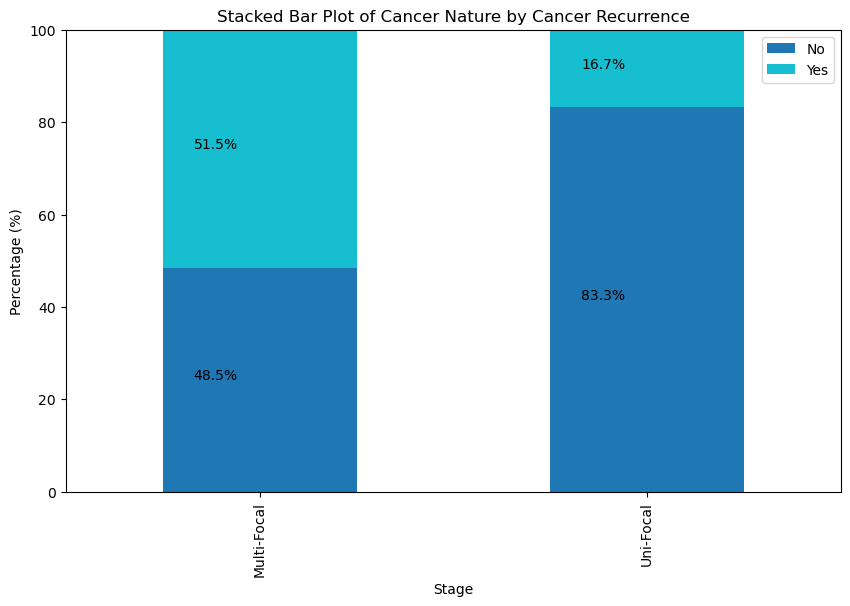

In [27]:
cross=pd.crosstab(index=df["Focality"],columns=df['Recurred'])
croostab_pre=cross.div(cross.sum(axis=1), axis=0) * 100

plt.figure(figsize=(100, 6))
croostab_pre.plot(kind="bar", stacked=True, colormap='tab10', figsize=(10, 6))

plt.xlabel("Stage")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*croostab_pre.index.values]):
    for (proportion, y_loc) in zip(croostab_pre.loc[x], croostab_pre.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Cancer Nature by Cancer Recurrence')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.show()

In [28]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['fotal_s']=df["Focality"].astype("category").cat.codes
df['re_s']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['fotal_s'], df['re_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['fotal_s','re_s'],inplace=True)

Chi-Square Statistic: 47.79634368176791
p-value: 4.728730989321359e-12
Degrees of Freedom: 1
Expected Frequencies:
 [[ 95.64835165  40.35164835]
 [160.35164835  67.64835165]]


### thyroid fuction vs recurred

<Figure size 10000x600 with 0 Axes>

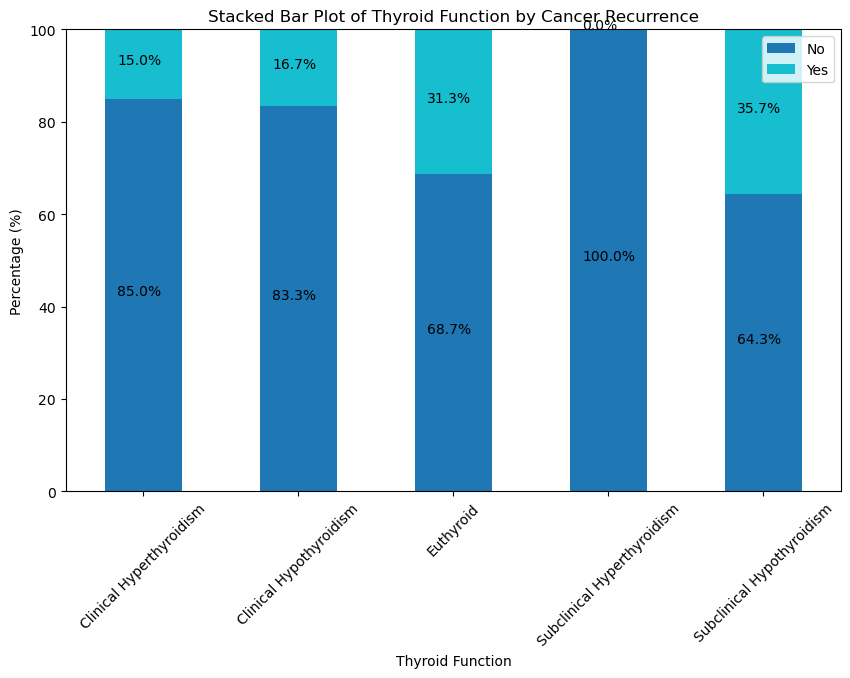

In [29]:
cross=pd.crosstab(index=df["Thyroid Function"],columns=df['Recurred'])
croostab_pre=cross.div(cross.sum(axis=1), axis=0) * 100

plt.figure(figsize=(100, 6))
croostab_pre.plot(kind="bar", stacked=True, colormap='tab10', figsize=(10, 6))

plt.xlabel("Thyroid Function")
plt.ylabel("Percentage (%)")  # Adjusted ylabel to reflect percentages

# Add annotations with percentages
for n, x in enumerate([*croostab_pre.index.values]):
    for (proportion, y_loc) in zip(croostab_pre.loc[x], croostab_pre.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=10
                 )

plt.legend(loc='upper right')
plt.title('Stacked Bar Plot of Thyroid Function by Cancer Recurrence')
plt.ylim(0, 100)  # Set y-axis limit to 0-100

plt.xticks(rotation=45)
plt.show()

In [30]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
df['thyfu_s']=df["Thyroid Function"].astype("category").cat.codes
df['re_s']=df["Recurred"].astype("category").cat.codes

contingency_table = pd.crosstab(df['thyfu_s'], df['re_s'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


# drop the created columns
df.drop(columns=['thyfu_s','re_s'],inplace=True)

Chi-Square Statistic: 5.792854919782669
p-value: 0.2151612864624312
Degrees of Freedom: 4
Expected Frequencies:
 [[ 14.06593407   5.93406593]
 [  8.43956044   3.56043956]
 [220.13186813  92.86813187]
 [  3.51648352   1.48351648]
 [  9.84615385   4.15384615]]


# Preprossess the data set


In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,LabelEncoder

In [32]:
minx=MinMaxScaler()
con=['Age']
df_m=minx.fit_transform(df[con])
df_sc=pd.DataFrame(df_m,columns=df[con].columns)
df_sc.head(1)

,Age
0,0.179104


In [33]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [34]:
cat=['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
pd_cat=pd.get_dummies(df[cat],dtype=int,drop_first=True)
pd_cat.head(1)

,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
label_encoder = LabelEncoder()

df["Recurred"] = label_encoder.fit_transform(df["Recurred"])

In [36]:



df3=pd.concat([df_sc,pd_cat,df["Recurred"]],axis=1)
df3.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred
0,0.179104,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.283582,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.223881,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.701493,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.701493,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
### Split the data set

In [38]:
from sklearn.model_selection import train_test_split
X=df3.drop('Recurred',axis=1)
y=df3["Recurred"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Imbalanced Datasets and Applying SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [40]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Recurred
0    174
1     80
Name: count, dtype: int64
After SMOTE: Recurred
1    174
0    174
Name: count, dtype: int64


# Model's Fitting

### Logistic Regresion Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
logitmodel=LogisticRegression(max_iter=500)


In [42]:
logitmodel.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=500)

In [43]:
y_pred=logitmodel.predict(X_test)
print(y_pred)


[0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [44]:
y_train_pred=logitmodel.predict(X_train)
print("Acurracy for training set:")
accuracy_score(y_train,y_train_pred)

Acurracy for training set:


0.952755905511811

In [45]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing set accuracy:", test_accuracy)

Testing set accuracy: 0.9545454545454546


In [46]:
from sklearn.metrics import classification_report
Cl=classification_report(y_test, y_pred)
print("clasification report:")
print(Cl)


clasification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        82
           1       0.90      0.93      0.91        28

    accuracy                           0.95       110
   macro avg       0.94      0.95      0.94       110
weighted avg       0.96      0.95      0.95       110



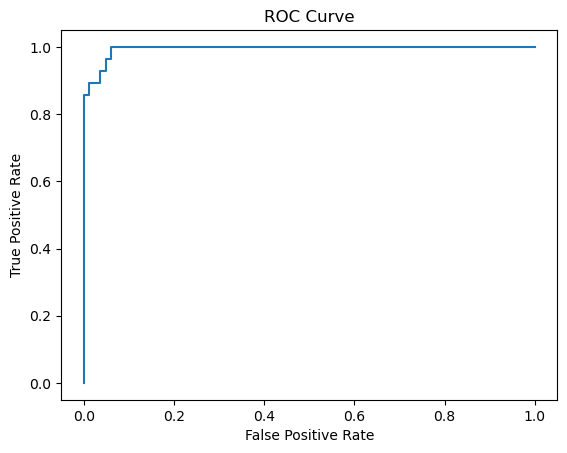

0.9943379790940766

In [47]:
y_pred_prpl=logitmodel.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpl[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc = roc_auc_score(y_test, y_pred_prpl[:,1])
auc

###  SVC

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score
suppvm=SVC(probability=True)

#model fitting
suppvm.fit(X_train_sm,y_train_sm)



SVC(probability=True)

In [49]:
#predict
y_pred_svc=suppvm.predict(X_test)
print(y_pred_svc)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1]


In [50]:
from sklearn.metrics import classification_report
svc_cl=classification_report(y_test,y_pred_svc)
print("clasification report:")
print(svc_cl)

clasification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        82
           1       0.90      0.93      0.91        28

    accuracy                           0.95       110
   macro avg       0.94      0.95      0.94       110
weighted avg       0.96      0.95      0.95       110



In [51]:
from sklearn.metrics import accuracy_score
svc_ac=accuracy_score(y_test,y_pred_svc)
print(svc_ac)

0.9545454545454546


In [52]:
y_train_preds=suppvm.predict(X_train)
print("Acurracy for training set svm:")
accuracy_score(y_train,y_train_preds)

Acurracy for training set svm:


0.984251968503937

#### ROC curve and AUC value

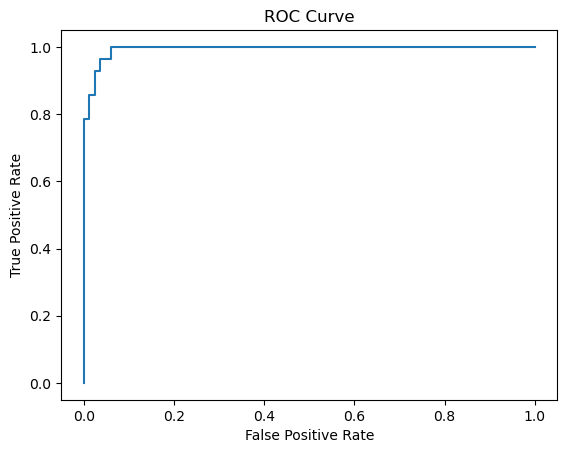

In [53]:
y_pred_prpb=suppvm.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpb[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [54]:
auc = roc_auc_score(y_test, y_pred_prpb[:,1])
auc

0.9939024390243902

### random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=100)

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=100)

In [58]:
y_pred_rf=rf.predict(X_test)
print(y_pred_rf)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1]


In [59]:
cl_rf=classification_report(y_test,y_pred_rf)
print("clasification report:")
print(cl_rf)

clasification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        82
           1       0.93      0.93      0.93        28

    accuracy                           0.96       110
   macro avg       0.95      0.95      0.95       110
weighted avg       0.96      0.96      0.96       110



In [60]:
accuracy_score(y_test,y_pred_rf)

0.9636363636363636

In [61]:
y_train_predr=rf.predict(X_train)
print("Acurracy for training set random:")
accuracy_score(y_train,y_train_predr)

Acurracy for training set random:


0.984251968503937

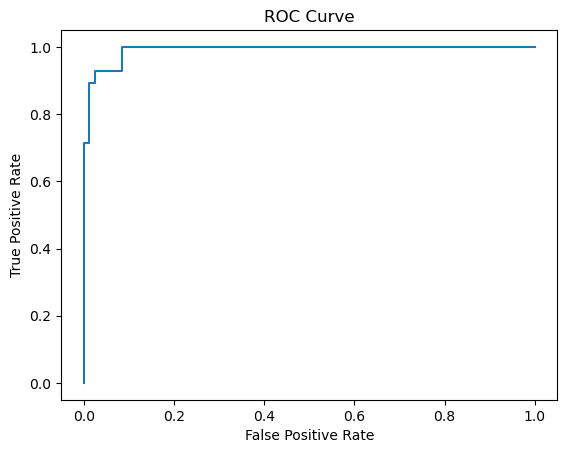

In [62]:
y_pred_prpbf=rf.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpbf[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [63]:
auc = roc_auc_score(y_test, y_pred_prpbf[:,1])
auc

0.9908536585365854

In [64]:
#### hyperparameter tuning for RandomForest

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9647058823529411


c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
532 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter

###  KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [69]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [70]:
y_pred_knn=knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9454545454545454

In [71]:
cl_knn=classification_report(y_test,y_pred_knn)
print(cl_knn)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        82
           1       0.87      0.93      0.90        28

    accuracy                           0.95       110
   macro avg       0.92      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110



#### after hyper parameter tuning KNN 

In [72]:
params = {
 'n_neighbors': list(range(1, 20)),
 'weights': ['uniform', 'distance'],
 'p': [1,2]
}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, n_jobs=5, verbose=1)
grid_search.fit(X_train_sm,y_train_sm)
y_pred_knng=grid_search.predict(X_test)
accuracy_score(y_test,y_pred_knng)
print(classification_report(y_test,y_pred_knng))

Fitting 5 folds for each of 76 candidates, totalling 380 fits
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        82
           1       0.83      0.86      0.84        28

    accuracy                           0.92       110
   macro avg       0.89      0.90      0.89       110
weighted avg       0.92      0.92      0.92       110



In [73]:
print(grid_search.best_params_)

{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [74]:
y_train_predknn=grid_search.predict(X_train)
print("Acurracy for training set knn:")
accuracy_score(y_train,y_train_predknn)

Acurracy for training set knn:


1.0

In [75]:
accuracy_score(y_test,y_pred_knng)

0.9181818181818182

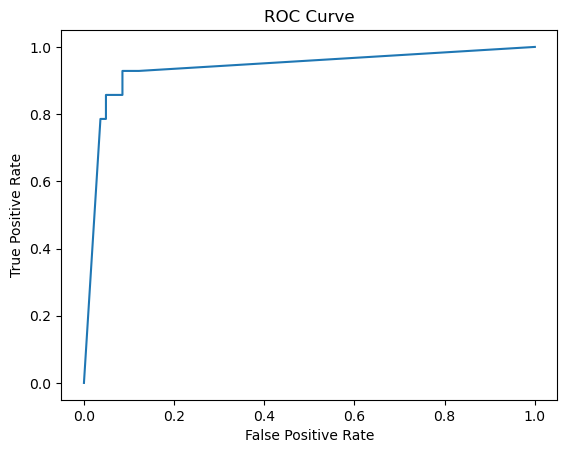

0.9359756097560976

In [76]:
y_pred_prpbfn=grid_search.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test,y_pred_prpbfn[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc = roc_auc_score(y_test, y_pred_prpbfn[:,1])
auc

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 50)

In [78]:
ad.fit(X_train,y_train)

c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.01)

In [79]:
y_ad=ad.predict(X_test)

In [80]:
print(classification_report(y_test,y_ad))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        82
           1       0.96      0.86      0.91        28

    accuracy                           0.95       110
   macro avg       0.96      0.92      0.94       110
weighted avg       0.95      0.95      0.95       110



In [81]:
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(random_state=100)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Set up GridSearchCV
grid_searchad = GridSearchCV(estimator=ada, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_searchad.fit(X, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Best score: 0.9656314699792962


c:\Users\DanukaDilshanRathnay\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [82]:
from xgboost import XGBClassifier

In [83]:
xg=XGBClassifier()

In [84]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
prd_xg=xg.predict(X_test)

In [86]:
print(classification_report(y_test,prd_xg))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        82
           1       0.86      0.89      0.88        28

    accuracy                           0.94       110
   macro avg       0.91      0.92      0.92       110
weighted avg       0.94      0.94      0.94       110



In [87]:
### select the random forest model as our best model

In [88]:
###features selection

In [89]:
bestmodel=grid_search

In [90]:
import joblib
joblib.dump(bestmodel,'best_model.pkl')

['best_model.pkl']

In [91]:
import pickle
with open("best_model.pkl",'rb') as file:
    best_model=pickle.load(file)

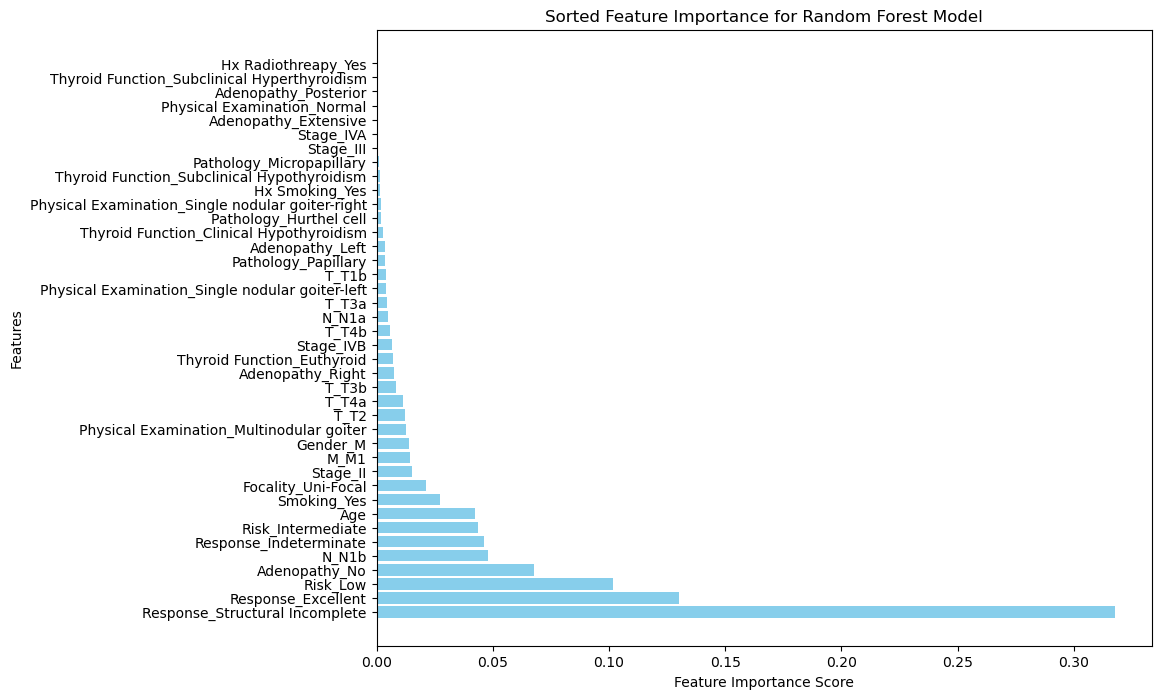

In [92]:
feature_importances = rf.feature_importances_
features = X_train.columns
# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Sorted Feature Importance for Random Forest Model")
plt.show()

In [93]:
print(sorted_features)

Index(['Response_Structural Incomplete', 'Response_Excellent', 'Risk_Low',
       'Adenopathy_No', 'N_N1b', 'Response_Indeterminate', 'Risk_Intermediate',
       'Age', 'Smoking_Yes', 'Focality_Uni-Focal', 'Stage_II', 'M_M1',
       'Gender_M', 'Physical Examination_Multinodular goiter', 'T_T2', 'T_T4a',
       'T_T3b', 'Adenopathy_Right', 'Thyroid Function_Euthyroid', 'Stage_IVB',
       'T_T4b', 'N_N1a', 'T_T3a',
       'Physical Examination_Single nodular goiter-left', 'T_T1b',
       'Pathology_Papillary', 'Adenopathy_Left',
       'Thyroid Function_Clinical Hypothyroidism', 'Pathology_Hurthel cell',
       'Physical Examination_Single nodular goiter-right', 'Hx Smoking_Yes',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Pathology_Micropapillary', 'Stage_III', 'Stage_IVA',
       'Adenopathy_Extensive', 'Physical Examination_Normal',
       'Adenopathy_Posterior', 'Thyroid Function_Subclinical Hyperthyroidism',
       'Hx Radiothreapy_Yes'],
      dtype='object')


In [94]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [95]:
sel_cat=['Response','Risk','Adenopathy','N',"Smoking","Focality","Stage","M",'Gender','Physical Examination','T']
sele_con=["Age"]

In [121]:
df["Stage"].value_counts()

Stage
I      314
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

In [103]:
df_cattt=pd.get_dummies(df[sel_cat],dtype=int,drop_first=True)
df4=pd.concat([df_cattt,df_sc,df["Recurred"]],axis=1)
df4.head()

X_se=df4.drop(columns=["Recurred"],axis=1)
y_se=df4['Recurred']

#### fit the randomforset model for selected varibles

In [105]:
X_train_sel,X_test_sel,y_train_sel,y_test_sel=train_test_split(X_se,y_se,test_size=0.3,random_state=100)

In [107]:
rf.fit(X_train_sel,y_train_sel)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=100)

In [108]:
y_sel=rf.predict(X_test_sel)

In [109]:
print(classification_report(y_test_sel,y_sel))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        82
           1       0.92      0.86      0.89        28

    accuracy                           0.95       110
   macro avg       0.94      0.92      0.93       110
weighted avg       0.94      0.95      0.94       110



In [110]:
bestmodelsel=rf

In [111]:
import joblib
joblib.dump(bestmodelsel,'best_modelrf.pkl')

['best_modelrf.pkl']

In [112]:
import pickle
with open("best_modelrf.pkl",'rb') as file:
    best_model=pickle.load(file)